## Chapter9P Input/Output operations

In [1]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pickle
import numpy as np
from random import gauss


In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
path = '/Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/'

In [5]:
pkl_file = open(path+ 'data.pkl', 'wb')

In [6]:
%time pickle.dump(a, pkl_file)

CPU times: user 5.48 ms, sys: 1.78 ms, total: 7.27 ms
Wall time: 7.39 ms


In [7]:
pkl_file.close()

In [8]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff   9003247 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:14 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [9]:
pkl_file = open(path + 'data.pkl', 'rb')
# open the file for reading in binary mode(rb)

In [10]:
%time b = pickle.load(pkl_file)
# read the object from disk and deserializes it.

CPU times: user 8.64 ms, sys: 2.96 ms, total: 11.6 ms
Wall time: 11 ms


In [11]:
a[:3]

[3.72132534962139, 1.5893467563150696, -3.257851550189388]

In [12]:
b[:3]

[3.72132534962139, 1.5893467563150696, -3.257851550189388]

In [13]:
np.allclose(np.array(a), np.array(b))
# converting a and b to ndarray objects, np.allclose() verifies that both contain the same data (numbers)

True

In [14]:
pkl_file = open(path + 'data.pkl', 'wb')

In [15]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 13.6 ms, sys: 1.32 ms, total: 14.9 ms
Wall time: 14.2 ms


In [16]:
%time pickle.dump(np.array(a)**2, pkl_file)

CPU times: user 19.8 ms, sys: 1.88 ms, total: 21.7 ms
Wall time: 23.8 ms


In [17]:
pkl_file.close()

In [18]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  16000326 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:14 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [19]:
pkl_file = open(path+'data.pkl', 'rb')

In [20]:
x= pickle.load(pkl_file)
x[:4]

array([ 3.72132535,  1.58934676, -3.25785155, -0.26489784])

In [21]:
y= pickle.load(pkl_file)
y[:4]

array([13.84826236,  2.52602311, 10.61359672,  0.07017086])

In [22]:
pkl_file.close()

In [23]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file) # stor a dict object containing the two ndarray objects. 
pkl_file.close()

In [24]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file) # retrivevs the dict object
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 3.72132535  1.58934676 -3.25785155 -0.26489784]
y [13.84826236  2.52602311 10.61359672  0.07017086]


In [25]:
!rm -f $path*

In [26]:
import pandas as pd

In [27]:
rows = 5000
a = np.random.standard_normal((rows,5)).round(4)

In [28]:
a

array([[ 1.9879, -1.2567, -1.2698, -1.0569,  0.2755],
       [ 1.2938,  0.0833,  1.561 , -0.4701,  0.1308],
       [-0.1669, -1.2796, -1.0502, -0.7312, -1.2533],
       ...,
       [-0.2173,  0.2358, -0.1045,  0.388 ,  2.1676],
       [ 0.5454, -0.2064,  1.094 ,  0.6506,  0.4044],
       [ 0.1995,  0.9736, -1.3093, -1.3257,  0.8569]], shape=(5000, 5))

In [29]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='h')

In [30]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='h')

In [31]:
csv_file = open(path+'data.csv','w')

In [32]:
header = 'date,no1,no2,no3,no4,no5\n'
# opens a file for writing (w)

In [33]:
csv_file.write(header)
# define the header row (column labels) and writes it as the first line.

25

In [34]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)
    csv_file.write(s)

In [35]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  279385 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.csv


In [36]:
csv_file = open (path+'data.csv', 'r')

In [37]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,1.9879,-1.2567,-1.2698,-1.0569,0.2755
2019-01-01 01:00:00,1.2938,0.0833,1.561,-0.4701,0.1308
2019-01-01 02:00:00,-0.1669,-1.2796,-1.0502,-0.7312,-1.2533
2019-01-01 03:00:00,-0.8917,-0.6826,1.0881,-0.087,0.3177


In [38]:
csv_file.close()

In [39]:
csv_file = open(path + 'data.csv', 'r')

In [40]:
content = csv_file.readlines()

In [41]:
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,1.9879,-1.2567,-1.2698,-1.0569,0.2755\n',
 '2019-01-01 01:00:00,1.2938,0.0833,1.561,-0.4701,0.1308\n',
 '2019-01-01 02:00:00,-0.1669,-1.2796,-1.0502,-0.7312,-1.2533\n',
 '2019-01-01 03:00:00,-0.8917,-0.6826,1.0881,-0.087,0.3177\n']

In [42]:
csv_file.close()

In [43]:
import csv
csv.field_size_limit(100000000)

131072

In [44]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [45]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '1.9879', '-1.2567', '-1.2698', '-1.0569', '0.2755'],
 ['2019-01-01 01:00:00', '1.2938', '0.0833', '1.561', '-0.4701', '0.1308'],
 ['2019-01-01 02:00:00',
  '-0.1669',
  '-1.2796',
  '-1.0502',
  '-0.7312',
  '-1.2533'],
 ['2019-01-01 03:00:00', '-0.8917', '-0.6826', '1.0881', '-0.087', '0.3177']]

In [46]:
with open(path+'data.csv','r') as f:
    csv_reader = csv.DictReader(f)
    lines = [line for line in csv_reader]

In [47]:
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '1.9879',
  'no2': '-1.2567',
  'no3': '-1.2698',
  'no4': '-1.0569',
  'no5': '0.2755'},
 {'date': '2019-01-01 01:00:00',
  'no1': '1.2938',
  'no2': '0.0833',
  'no3': '1.561',
  'no4': '-0.4701',
  'no5': '0.1308'},
 {'date': '2019-01-01 02:00:00',
  'no1': '-0.1669',
  'no2': '-1.2796',
  'no3': '-1.0502',
  'no4': '-0.7312',
  'no5': '-1.2533'}]

In [48]:
!rm -f $path*

In [49]:
import sqlite3 as sq3

In [50]:
con = sq3.connect(path+'numbs.db')
# open database connection; a file is created if it does not exist

In [51]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
# A SQL query that creates a table with three columns

In [52]:
con.execute(query)
# executes the query


In [53]:
con.commit()
# and commits the changes

In [54]:
q = con.execute
# defines a short alias for the con.execute() method

In [55]:
q('SELECT * FROM sqlite_master').fetchall()
# fetches metainformation about the database, showing the just-created table as the single object.

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [56]:
import datetime

In [57]:
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))

/var/folders/ff/0rjbdk056r39pjbd0rm8g6440000gn/T/ipykernel_23323/3105697824.py:2: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))


In [58]:
# writes a single row (or record) to the numbs table.
np.random.seed(100)

In [59]:
# create a larger dummy data set as an ndarray object
data = np.random.standard_normal((10000,2)).round(4)

In [60]:
%%time
# iterate over the rows of the ndarray object.
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?,?,?)', (now, row[0], row[1]))
con.commit()
    

CPU times: user 16.4 ms, sys: 1.36 ms, total: 17.8 ms
Wall time: 17.5 ms


<timed exec>:4: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes


In [61]:
# Retrieves a number of rows from the table
q('SELECT * FROM numbs').fetchmany(4)

[('2026-01-12 13:16:38.016263', 0.12, 7.3),
 ('2026-01-12 13:16:38.026253', -1.7498, 0.3427),
 ('2026-01-12 13:16:38.026507', 1.153, -0.2524),
 ('2026-01-12 13:16:38.026526', 0.9813, 0.5142)]

In [62]:
q('SELECT * FROM numbs WHERE no1>0.5').fetchmany(4)

[('2026-01-12 13:16:38.026507', 1.153, -0.2524),
 ('2026-01-12 13:16:38.026526', 0.9813, 0.5142),
 ('2026-01-12 13:16:38.026539', 0.6727, -0.1044),
 ('2026-01-12 13:16:38.026544', 1.619, 1.5416)]

In [63]:
# define pointer object
pointer = q('SELECT * FROM numbs')

In [64]:
# ... that behaves like a generator object
for i in range(3):
    print(pointer.fetchone())

('2026-01-12 13:16:38.016263', 0.12, 7.3)
('2026-01-12 13:16:38.026253', -1.7498, 0.3427)
('2026-01-12 13:16:38.026507', 1.153, -0.2524)


In [65]:
# retrives all the remaining rows.
rows = pointer.fetchall()
rows[:3]

[('2026-01-12 13:16:38.026526', 0.9813, 0.5142),
 ('2026-01-12 13:16:38.026530', 0.2212, -1.07),
 ('2026-01-12 13:16:38.026532', -0.1895, 0.255)]

In [66]:
q('DROP TABLE IF EXISTS numbs')
#removes the table from database.

In [67]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [68]:
con.close()

In [69]:
!rm -f $path*

In [70]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00', dtype='datetime64[m]')

In [71]:
len(dtimes)

3681360

In [72]:
dty = np.dtype([('Date', 'datetime64[m]'),('No1','f'),('No2','f')])

In [73]:
data = np.zeros(len(dtimes), dtype=dty)

In [74]:
data['Date'] = dtimes
# populate data column

In [75]:
a = np.random.standard_normal((len(dtimes),2)).round(4)
# The dummy datasets

In [76]:
data['No1']= a[:,0]
data['No2'] = a[:,1]
#.. which populate the No1 and No2 columns

In [77]:
data.nbytes

58901760

In [78]:
%time np.save(path+'array', data)

CPU times: user 308 μs, sys: 4.9 ms, total: 5.21 ms
Wall time: 5.83 ms


In [79]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  58901952 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [80]:
%time np.load(path+'array.npy')

CPU times: user 452 μs, sys: 6.73 ms, total: 7.18 ms
Wall time: 6.61 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      shape=(3681360,), dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [81]:
%time data = np.random.standard_normal((10000,6000)).round(4)

CPU times: user 548 ms, sys: 43.2 ms, total: 591 ms
Wall time: 591 ms


In [82]:
data.nbytes

480000000

In [83]:
%time np.save(path+'array', data)

CPU times: user 289 μs, sys: 46.5 ms, total: 46.8 ms
Wall time: 110 ms


In [84]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  480000128 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [85]:
%time np.load(path+'array.npy')

CPU times: user 400 μs, sys: 41.9 ms, total: 42.3 ms
Wall time: 41.7 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]],
      shape=(10000, 6000))

In [86]:
!rm -f $path*

In [87]:
data = np.random.standard_normal((1000000,5)).round(4)

In [88]:
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

In [89]:
filename = path + 'numbers'

In [90]:
con = sq3.Connection(filename+'.db')

In [91]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'

In [92]:
q = con.execute
qm= con.executemany

In [93]:
q(query)

In [94]:
%%time
qm('INSERT INTO numbers VALUES (?,?,?,?,?)', data)
con.commit()

CPU times: user 517 ms, sys: 42.4 ms, total: 559 ms
Wall time: 566 ms


In [95]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [96]:
%%time
# retrieves all the rows from the table in a single step
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: user 317 ms, sys: 24.4 ms, total: 341 ms
Wall time: 340 ms


In [97]:
%%time
# retrieves a selsctino of the rows and transforms it to an ndarray object.
query = 'SELECT * FROM numbers WHERE No1>0 AND No2 <0'
res = np.array((q(query).fetchall())).round(3)

CPU times: user 149 ms, sys: 13.6 ms, total: 163 ms
Wall time: 162 ms


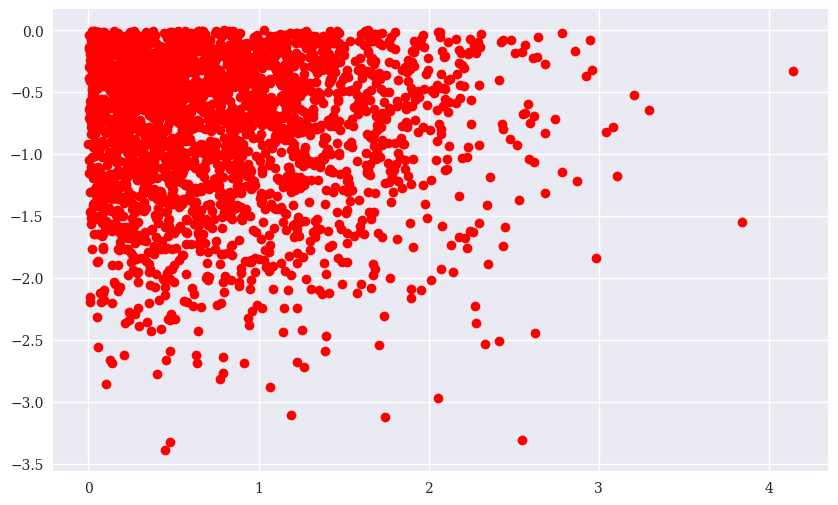

In [98]:
res = res[::100]
plt.figure(figsize=(10,6))
plt.plot(res[:,0], res[:,1],'ro')

Figure 9-1. Scatter plot of the query result (selection)

In [99]:
%time data = pd.read_sql('SELECT * FROM numbers',con)
# reads all the rows of the table into the DataFrame object named data

CPU times: user 438 ms, sys: 35.2 ms, total: 474 ms
Wall time: 476 ms


In [100]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [101]:
%time data[(data['No1']>0)&(data['No2']<0).head()]

CPU times: user 44.5 ms, sys: 3.07 ms, total: 47.6 ms
Wall time: 50.6 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137


In [102]:
%%time
q = '(No1<-0.5|No1>0.5)&(No2<-1|No2>1)'
res = data[['No1', 'No2']].query(q)

CPU times: user 11.7 ms, sys: 1.79 ms, total: 13.5 ms
Wall time: 5.6 ms


In [ ]:
import tables as tb
h5s = pd.HDFStore(filename + '.h5s', 'w')
# this opens an HDF5 database fiel for writing; in pandas an HDFStore object is created.

In [ ]:
%time h5s['data']=data
# the complete DataFrame object is stored in the database file via binary storage.

CPU times: user 11.2 ms, sys: 9.23 ms, total: 20.4 ms
Wall time: 22.5 ms


In [105]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s

In [106]:
h5s.close()

In [109]:
%%time
h5s = pd.HDFStore(filename+'.h5s','r')
data_ = h5s['data']
h5s.close()

CPU times: user 7.82 ms, sys: 7.42 ms, total: 15.2 ms
Wall time: 15 ms


In [110]:
data_ is data

False

In [111]:
(data_ == data).all()

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [112]:
np.allclose(data_, data)

True

In [114]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 13:17 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s


In [115]:
%time data.to_csv(filename+'.csv')

CPU times: user 1.26 s, sys: 41.4 ms, total: 1.3 s
Wall time: 1.31 s


In [116]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  43834157 Jan 12 13:22 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.csv
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 13:17 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s


In [117]:
%time df = pd.read_csv(filename+'.csv')

CPU times: user 160 ms, sys: 16 ms, total: 176 ms
Wall time: 180 ms


array([[<Axes: title={'center': 'No1'}>, <Axes: title={'center': 'No2'}>],
       [<Axes: title={'center': 'No3'}>, <Axes: title={'center': 'No4'}>]],
      dtype=object)

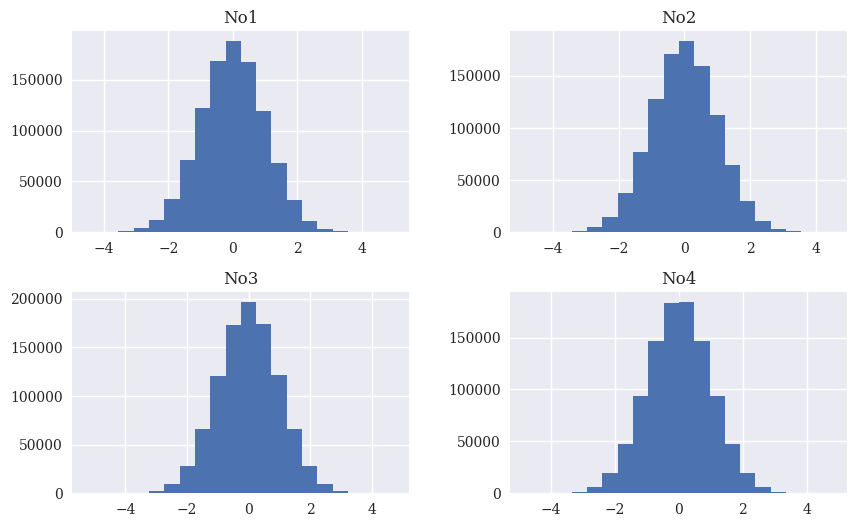

In [118]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20, figsize=(10,6))

Figure 9-3. Histograms for selected columns
 

In [120]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [121]:
%time data[:100000].to_excel(filename+'.xlsx')

CPU times: user 3.31 s, sys: 95.1 ms, total: 3.41 s
Wall time: 3.55 s


In [122]:
%time df = pd.read_excel(filename+'.xlsx','Sheet1')

CPU times: user 1.49 s, sys: 20.6 ms, total: 1.51 s
Wall time: 1.52 s


<Axes: >

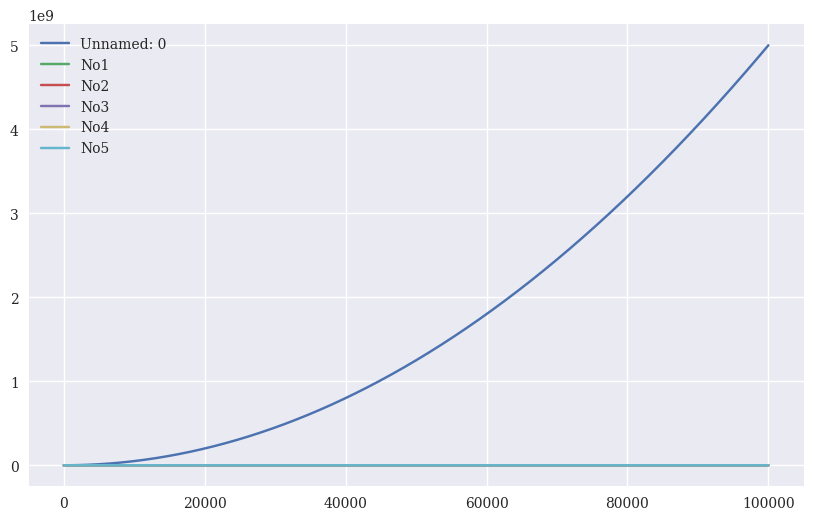

In [123]:
df.cumsum().plot(figsize=(10,6))

In [124]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  43834157 Jan 12 13:22 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.csv
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 13:16 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 13:17 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s
-rw-r--r--  1 youngsoom4pro  staff   4012957 Jan 12 13:26 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.xlsx


In [125]:
!rm -f $path*

In [126]:
import tables as tb
import datetime as dt

In [127]:
filename = path + 'pytab.h5'

In [ ]:
h5 = tb.open_file(filename, 'w')